In [ ]:
#EDA AND FEATURE ENGINEERING, CLEANING AND PREPARING DATA FOR MODEL TRAINING

In [ ]:
#PROBLEM STATEMENT
# A retail company "ABC Pvt. Ltd." wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from thr last month.
#The dataset also contains customer demographics (age, gender, marital status, city type, stay in current city, product details(product id and product category)) and total purchase amount from last month.
#Now, we want to build a model to predict the purchase amount of customer against products which will help them to create personalised offer for customers against different products.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(5,5)

In [ ]:
#importing the data set
data_train=pd.read_csv('/content/Black Friday Data Set EDA.csv')
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#import test data set
data_test=pd.read_csv("/content/Black friday Test data set.csv")
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
#merge both train and test data
data=data_train.append(data_test)

<ipython-input-488-e58859383437>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data_train.append(data_test)


In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#We can also use pd.merge, in pd.append() we add the dataset below (add rows) and in pd.merge() we add it alongside (add columns)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
#Dropping the useless column that is user ID
data.drop(["User_ID","Product_ID"],axis=1,inplace=True)
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#Data Preprocessing
data.dtypes
#5 categorical features

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [ ]:
#HANDLING CATEGORICAL FEATURES
#Converting Gender into numerical variable
#data['Gender']=pd.get_dummies(data['Gender'],drop_first=1)
#data.head()

In [ ]:
#Way 2
data['Gender']=data['Gender'].map({'F':0,'M':1})
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#Age
data['Age'].unique()
#gives number of unique values in age

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#pd.get_dummies(data['Age'],drop_first=True)
#not a good approach

In [ ]:
#Do ordinal encoding, give ranks because in different age groups the purchase capacity will be different
#TARGET GUIDED ENCODING
data['Age']=data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
#Apply Label Encoding
#from sklearn import preprocessing
#label_encoder=preprocessing.LabelEncoder()
#data['Age']=label_encoder.fit_transform(data['Age'])
#data['Age'].unique()

In [ ]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#City Categories
data_city=pd.get_dummies(data['City_Category'],drop_first=1)

In [ ]:
#combining data_city with dataset
data=pd.concat([data,data_city],axis=1)

In [ ]:
data.drop('City_Category',axis=1,inplace=True)

In [ ]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
#Checking missing values
data.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
#Focus on replacing missing values
data['Product_Category_2'].unique()
#this is a discrete feature and in discrete feature best way to replace nan values is with mode

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
data['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
#Replacing with mode
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2']).mode()[0]

In [ ]:
data['Product_Category_2'].isnull().sum()

0

In [ ]:
data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [ ]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,8.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [ ]:
#changing stay in current city years into numerical variables
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-513-3a90fdf68c40>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')


In [ ]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,8.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


In [ ]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)

In [ ]:
data['B']=data['B'].astype(int)
data['C']=data['C'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 71.7 MB


In [ ]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,8.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Occupation', ylabel='Purchase'>

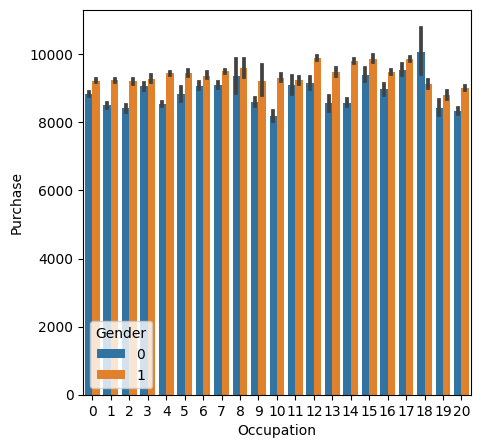

In [ ]:
#Visualisation of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Age', ylabel='Purchase'>

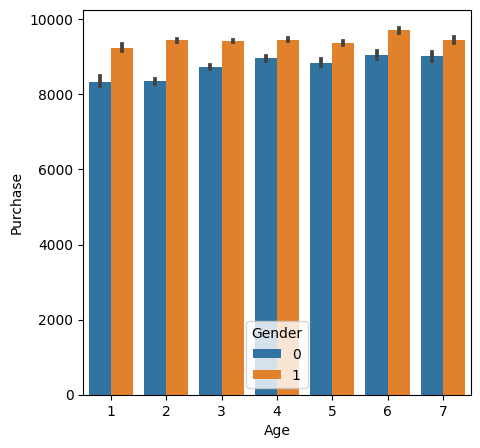

In [ ]:
#visualisation of purchase and age
sns.barplot(x='Age',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

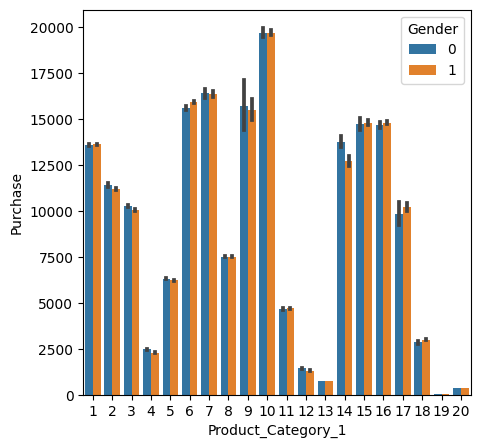

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

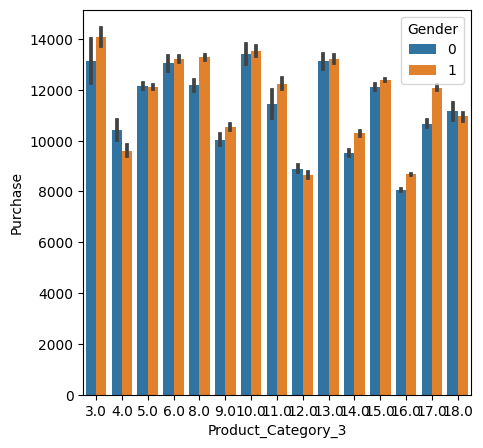

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=data)

In [ ]:
#Feature Scaling
data_test=data[data['Purchase'].isnull()]
data_train=data[~data['Purchase'].isnull()]

In [ ]:
data_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,8.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
x=data_train.drop('Purchase',axis=1)
y=data_train['Purchase']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)